In [1]:
import os
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk


In [6]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/riccardodandrea/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/riccardodandrea/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/riccardodandrea/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/riccardodandrea/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/riccardodandrea/nltk_data...
[nltk_data]    |   Package averaged_perceptron

True

--------------------------------

In [2]:
os.chdir("/home/riccardodandrea/Schreibtisch/Github/ReutersNOZ")
df = pd.read_csv("reuters_articles_with_split.csv")
topics = str(df["topics"])
topics

'0                                      cocoa\n1                                        NaN\n2                                        NaN\n3                                        NaN\n4        grain,wheat,corn,barley,oat,sorghum\n                        ...                 \n19038                                   ship\n19039                                    ipi\n19040                                   gold\n19041                                    NaN\n19042                                    NaN\nName: topics, Length: 19043, dtype: object'

In [3]:
#Settings

language="english"
sample_text=topics
stop_words=set(stopwords.words(language))

In [4]:
print("")
tokenized_sent=sent_tokenize(sample_text)
print("Sentences", tokenized_sent)
print("Number of Sentences:",len(tokenized_sent))
print("")


Sentences ['0                                      cocoa\n1                                        NaN\n2                                        NaN\n3                                        NaN\n4        grain,wheat,corn,barley,oat,sorghum\n                        ...                 \n19038                                   ship\n19039                                    ipi\n19040                                   gold\n19041                                    NaN\n19042                                    NaN\nName: topics, Length: 19043, dtype: object']
Number of Sentences: 1



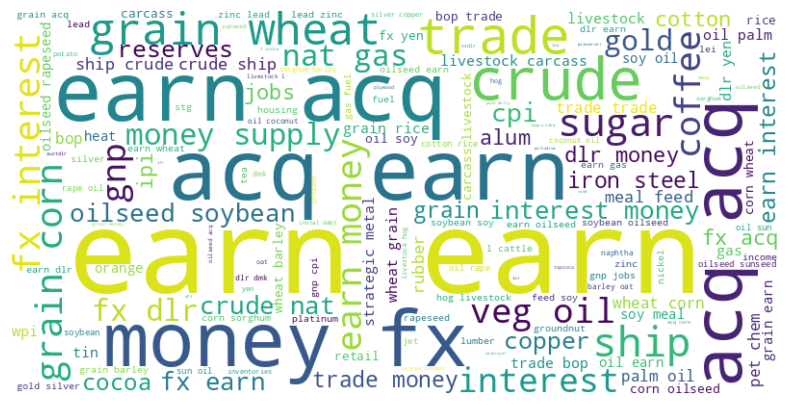

In [5]:

# Alle Topics aus dem DataFrame als String zusammenfügen
all_topics = ' '.join(df["topics"].dropna())  # NaN-Werte vermeiden

# Erstellen der WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_topics)

# Plotten der WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Keine Achsen anzeigen
plt.savefig("topic_freq", dpi=300)


In [ ]:
# Alle Topics in einer Liste speichern
topic_list = ' '.join(df["topics"].dropna()).split()  # Entfernt NaN und splittet Wörter

# Wortfrequenz zählen
word_counts = Counter(topic_list)

# Die 10 häufigsten Wörter ausgeben
print(word_counts.most_common())


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(vectorizer.get_feature_names_out())